In [1]:
import cv2
import numpy as np
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (192, 192))
    image = tf.image.rgb_to_grayscale(image) 
    image /= 255.0
    return image

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

In [3]:
model = tf.keras.models.load_model('cats_dogs_v2.h5', custom_objects={'leaky_relu':tf.nn.leaky_relu})

W0626 00:48:11.581754 139757406922560 deprecation.py:323] From /media/dracoboros/HDD/main/tensorflow2beta/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 188, 188, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 94, 94, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       7

In [5]:
image = load_and_preprocess_image('./cat.jpg')

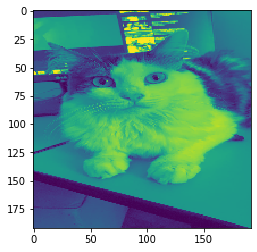

In [6]:
plt.imshow(tf.squeeze(image, 2))

In [7]:
image_to_predict = tf.reshape(image, (-1, 192,192, 1))

In [8]:
('Cat', 'Dog')[np.argmax(model(image_to_predict).numpy())]

'Cat'

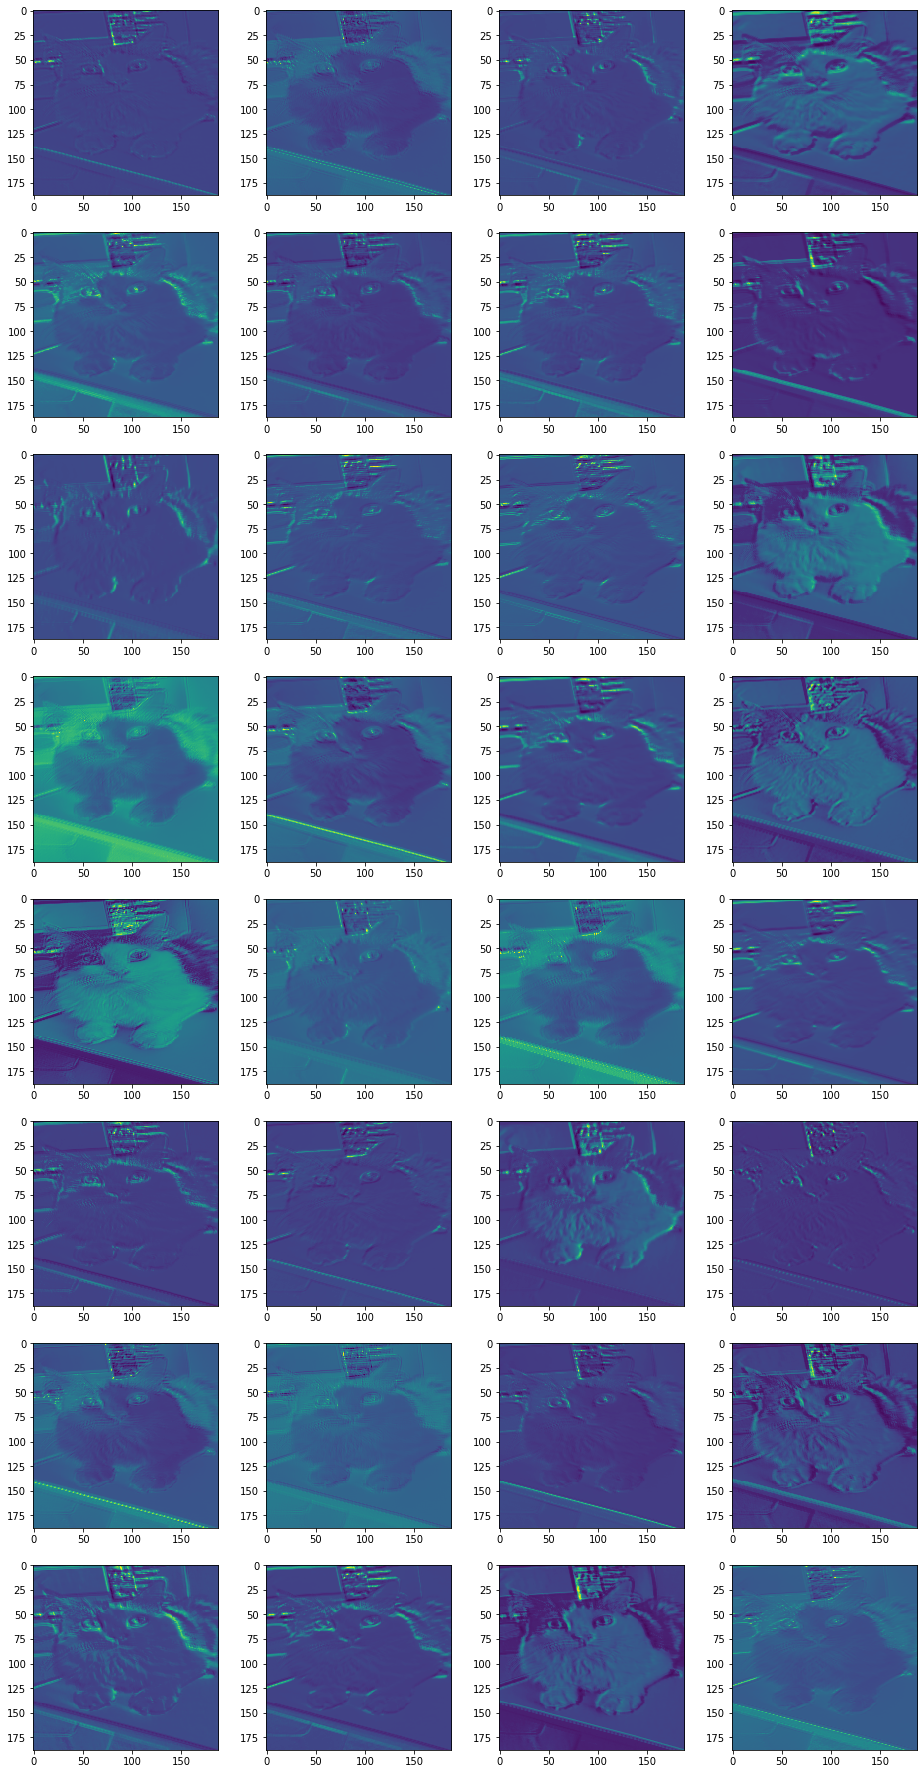

In [9]:
conv2d_output = model.layers[0](image_to_predict)

fig = plt.gcf()
fig.set_size_inches(4 * 4, 8 * 4)
for i in range(32):
    plt.subplot(8,4, i+1)
    plt.imshow(conv2d_output[0, :, :, i])

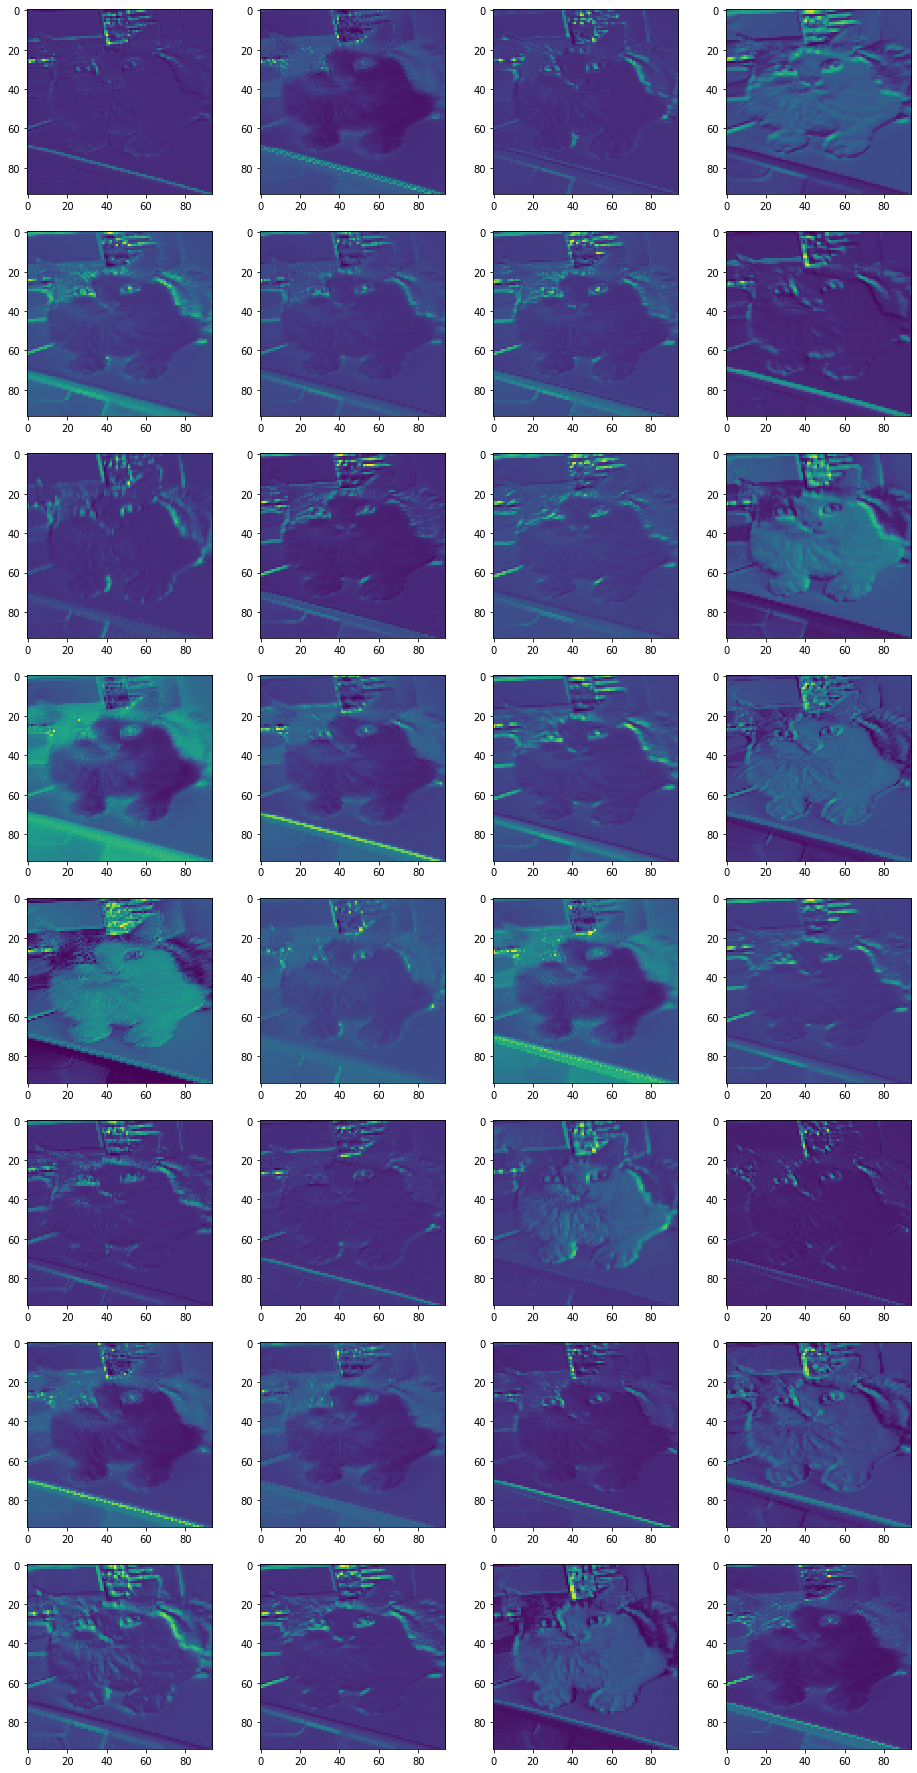

In [10]:
max_pooling2d_output = model.layers[1](conv2d_output)

fig = plt.gcf()
fig.set_size_inches(4 * 4, 8 * 4)
for i in range(32):
    plt.subplot(8,4, i+1)
    plt.imshow(max_pooling2d_output[0, :, :, i])

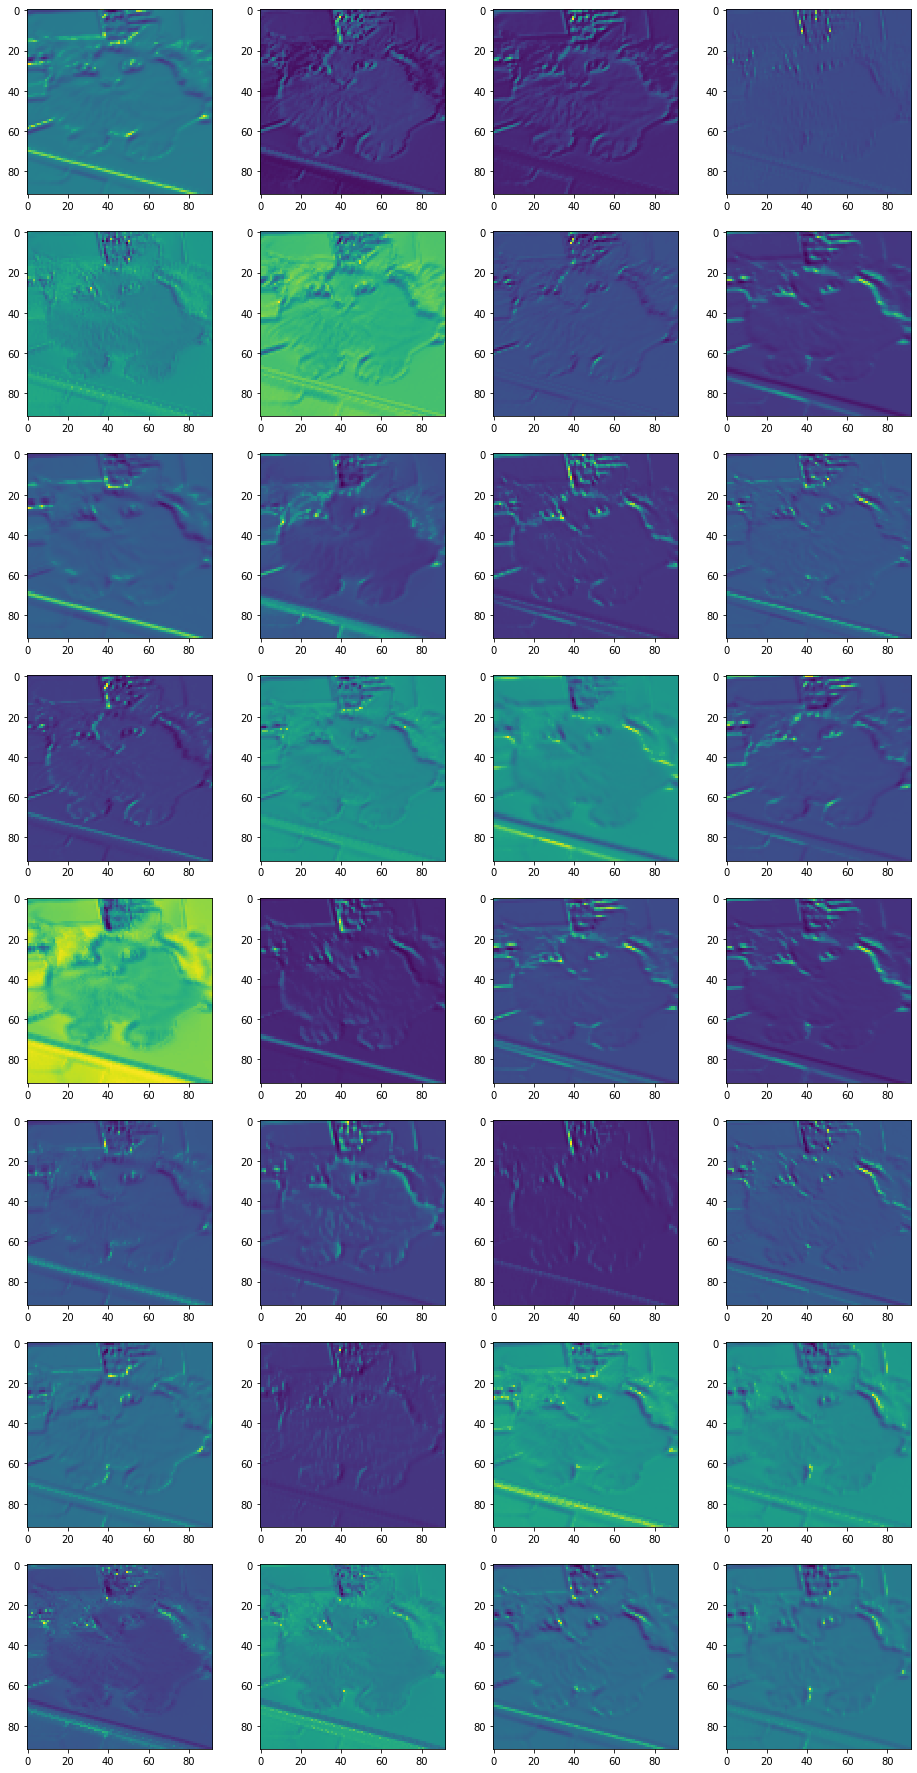

In [11]:
conv2d_1_output = model.layers[2](max_pooling2d_output)

fig = plt.gcf()
fig.set_size_inches(4 * 4, 8 * 4)
for i in range(32):
    plt.subplot(8,4, i+1)
    plt.imshow(conv2d_1_output[0, :, :, i])

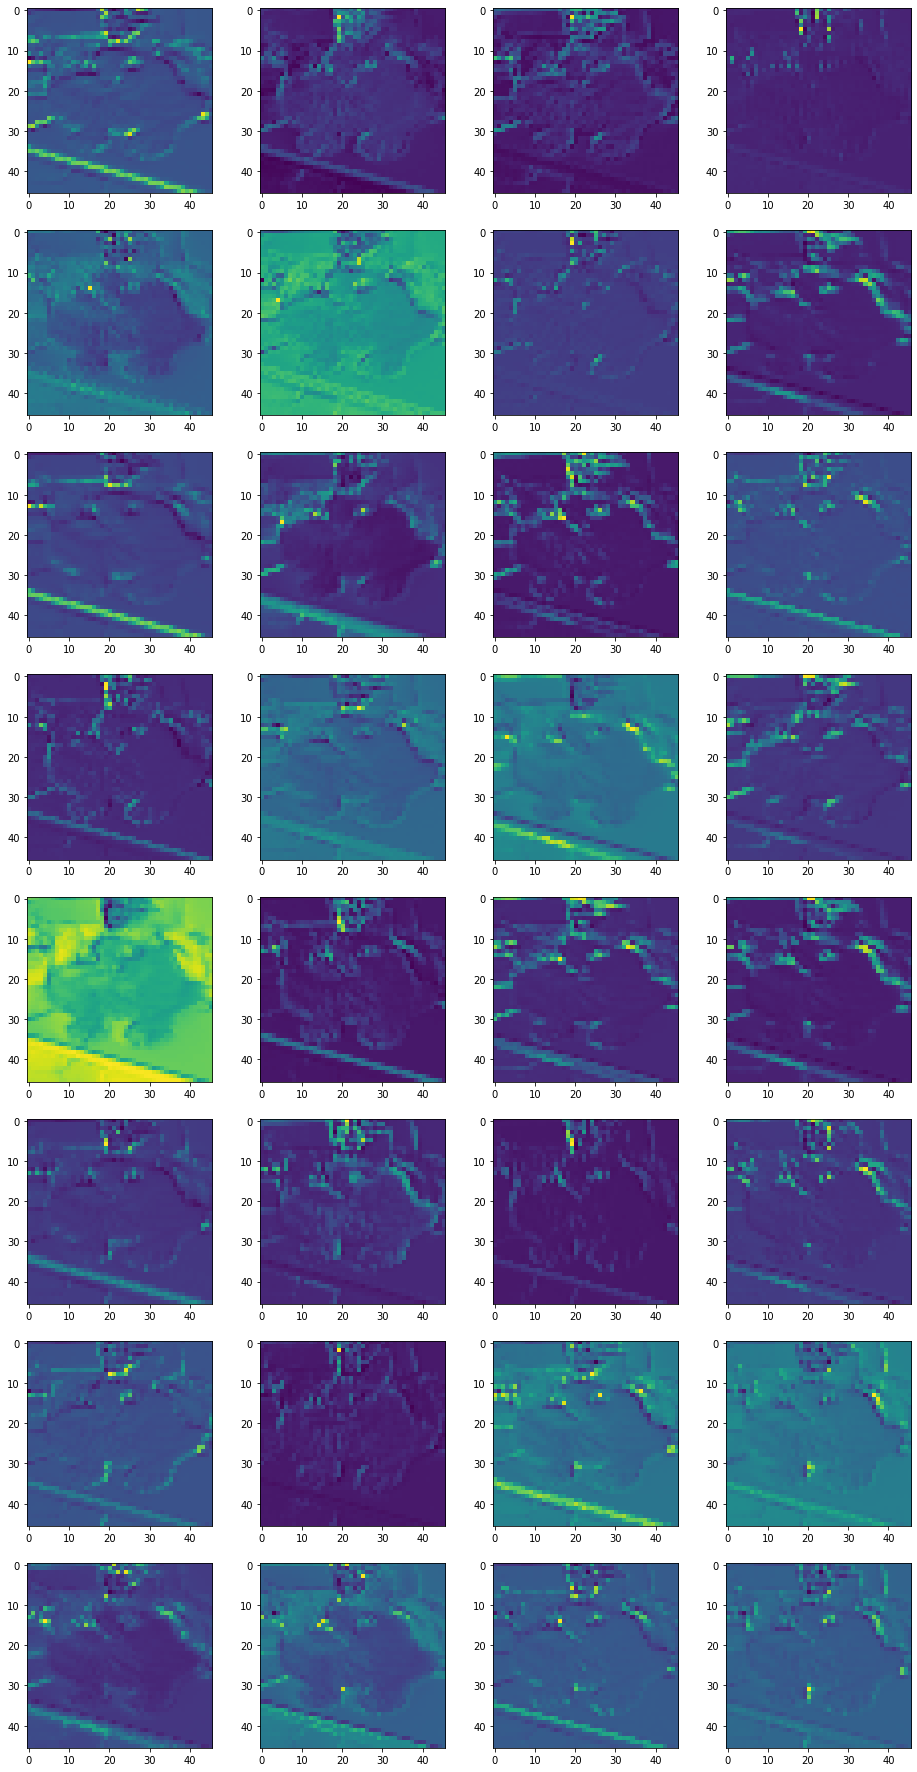

In [12]:
max_pooling2d_1_output = model.layers[3](conv2d_1_output)

fig = plt.gcf()
fig.set_size_inches(4 * 4, 8 * 4)
for i in range(32):
    plt.subplot(8,4, i+1)
    plt.imshow(max_pooling2d_1_output[0, :, :, i])

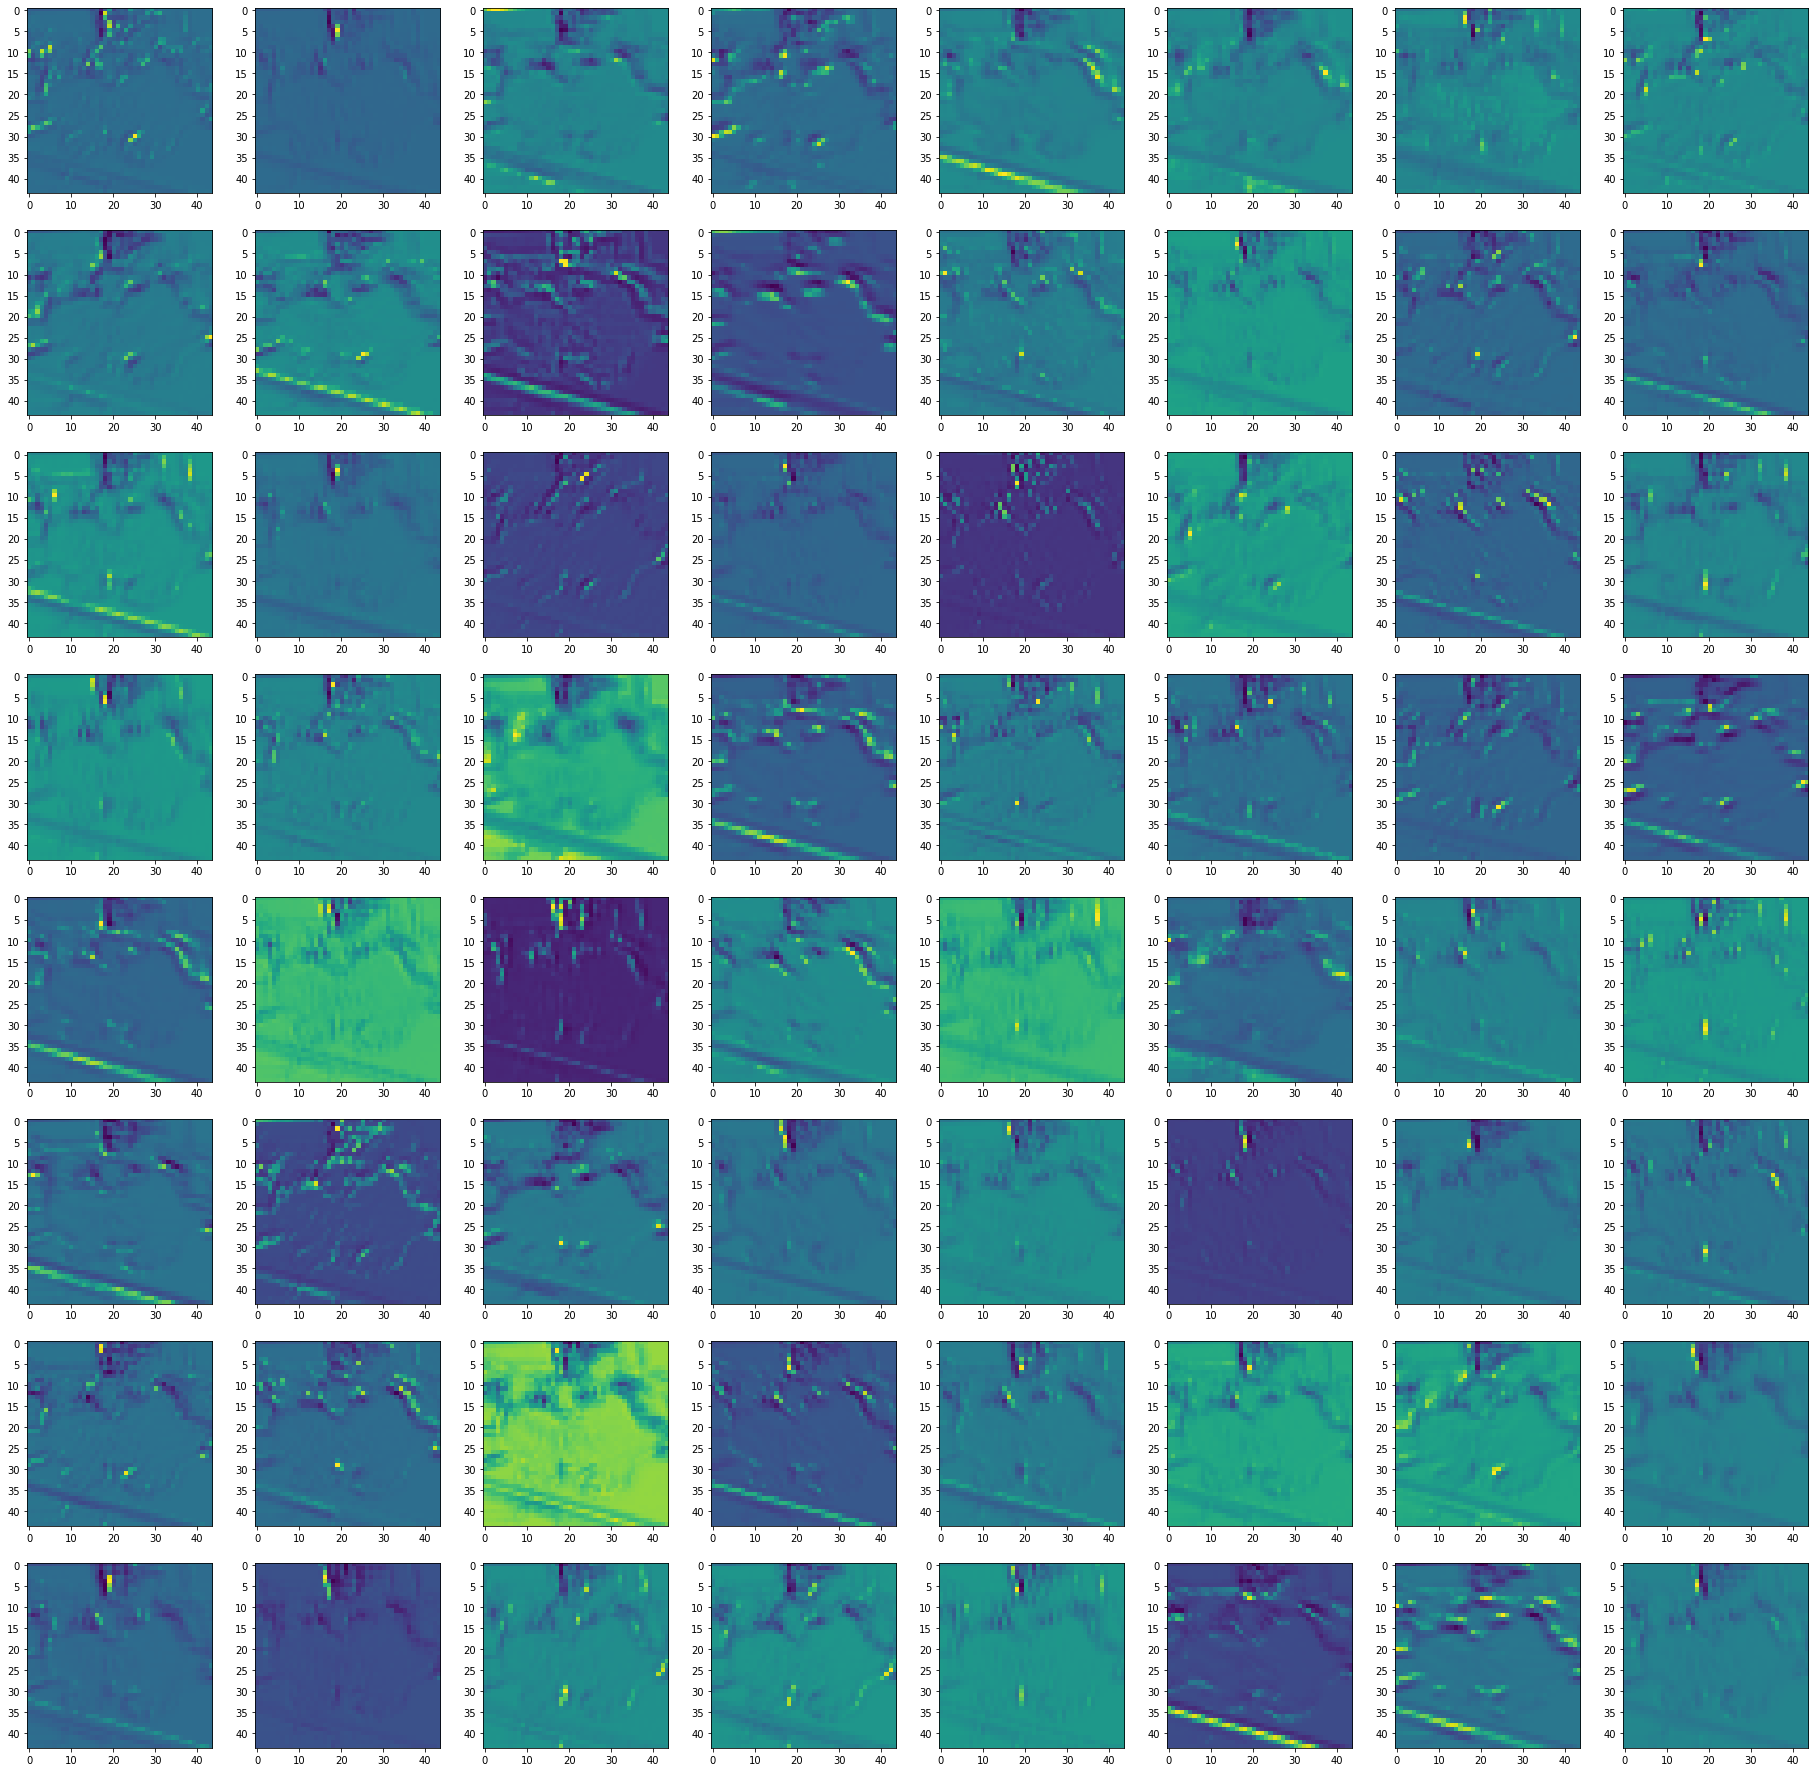

In [13]:
conv2d_2_output = model.layers[4](max_pooling2d_1_output)

fig = plt.gcf()
fig.set_size_inches(8 * 4, 8 * 4)
for i in range(64):
    plt.subplot(8,8, i+1)
    plt.imshow(conv2d_2_output[0, :, :, i])

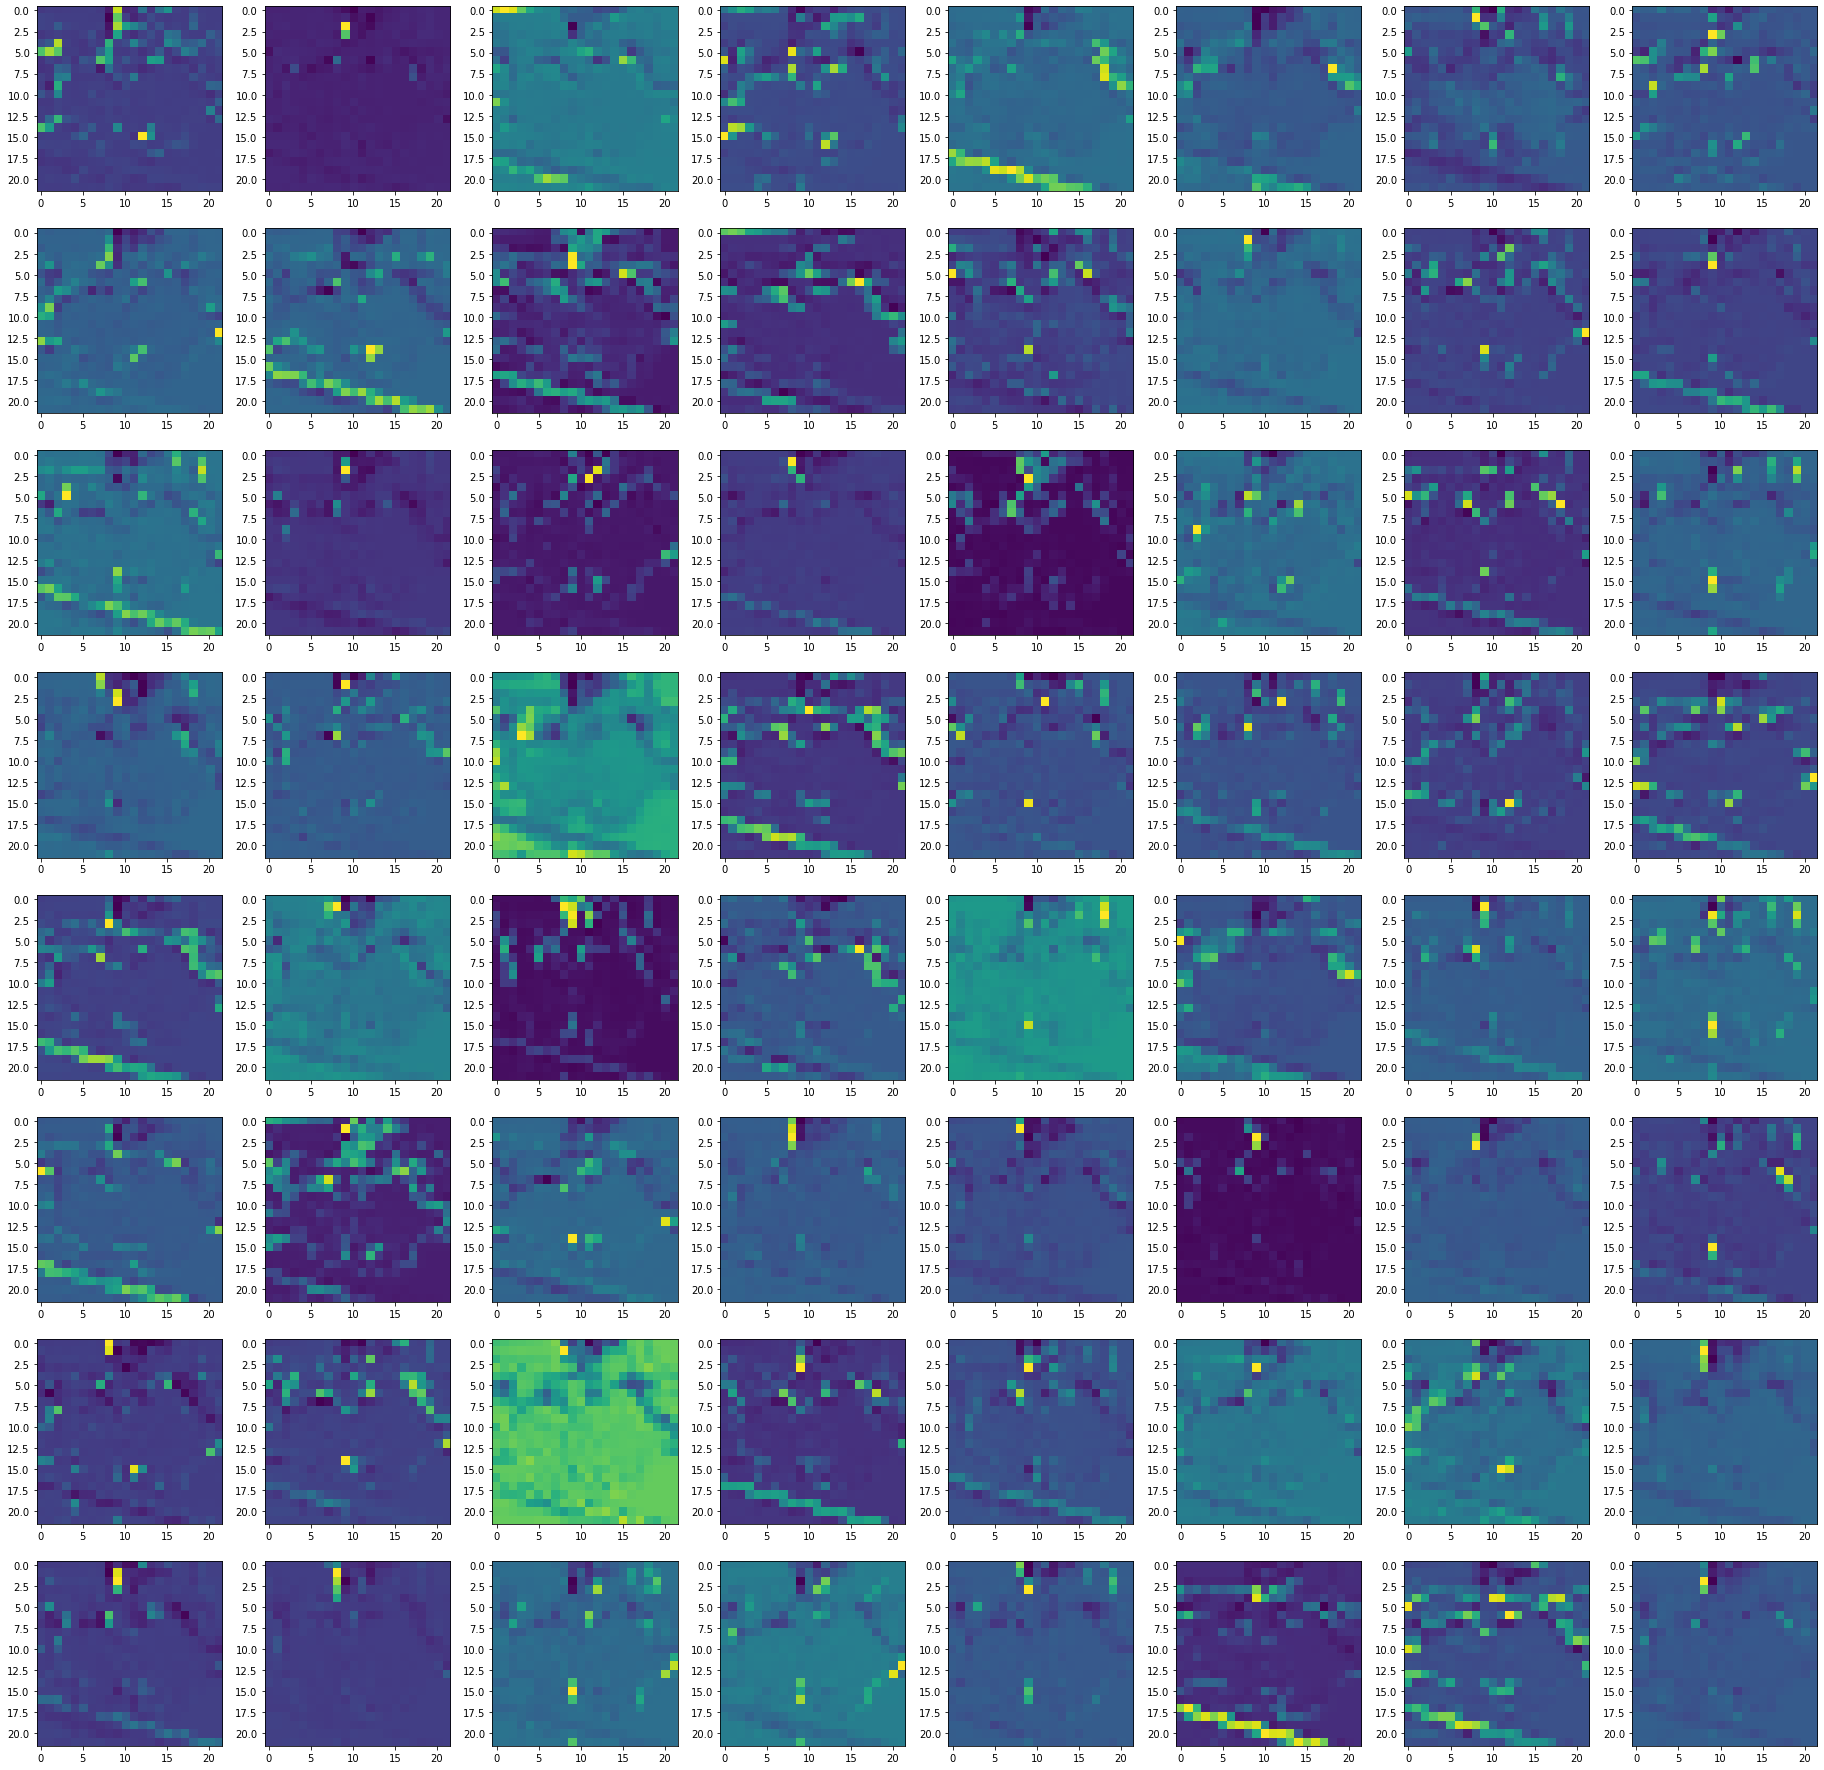

In [14]:
max_pooling2d_2_output = model.layers[5](conv2d_2_output)

fig = plt.gcf()
fig.set_size_inches(8 * 4, 8 * 4)
for i in range(64):
    plt.subplot(8,8, i+1)
    plt.imshow(max_pooling2d_2_output[0, :, :, i])

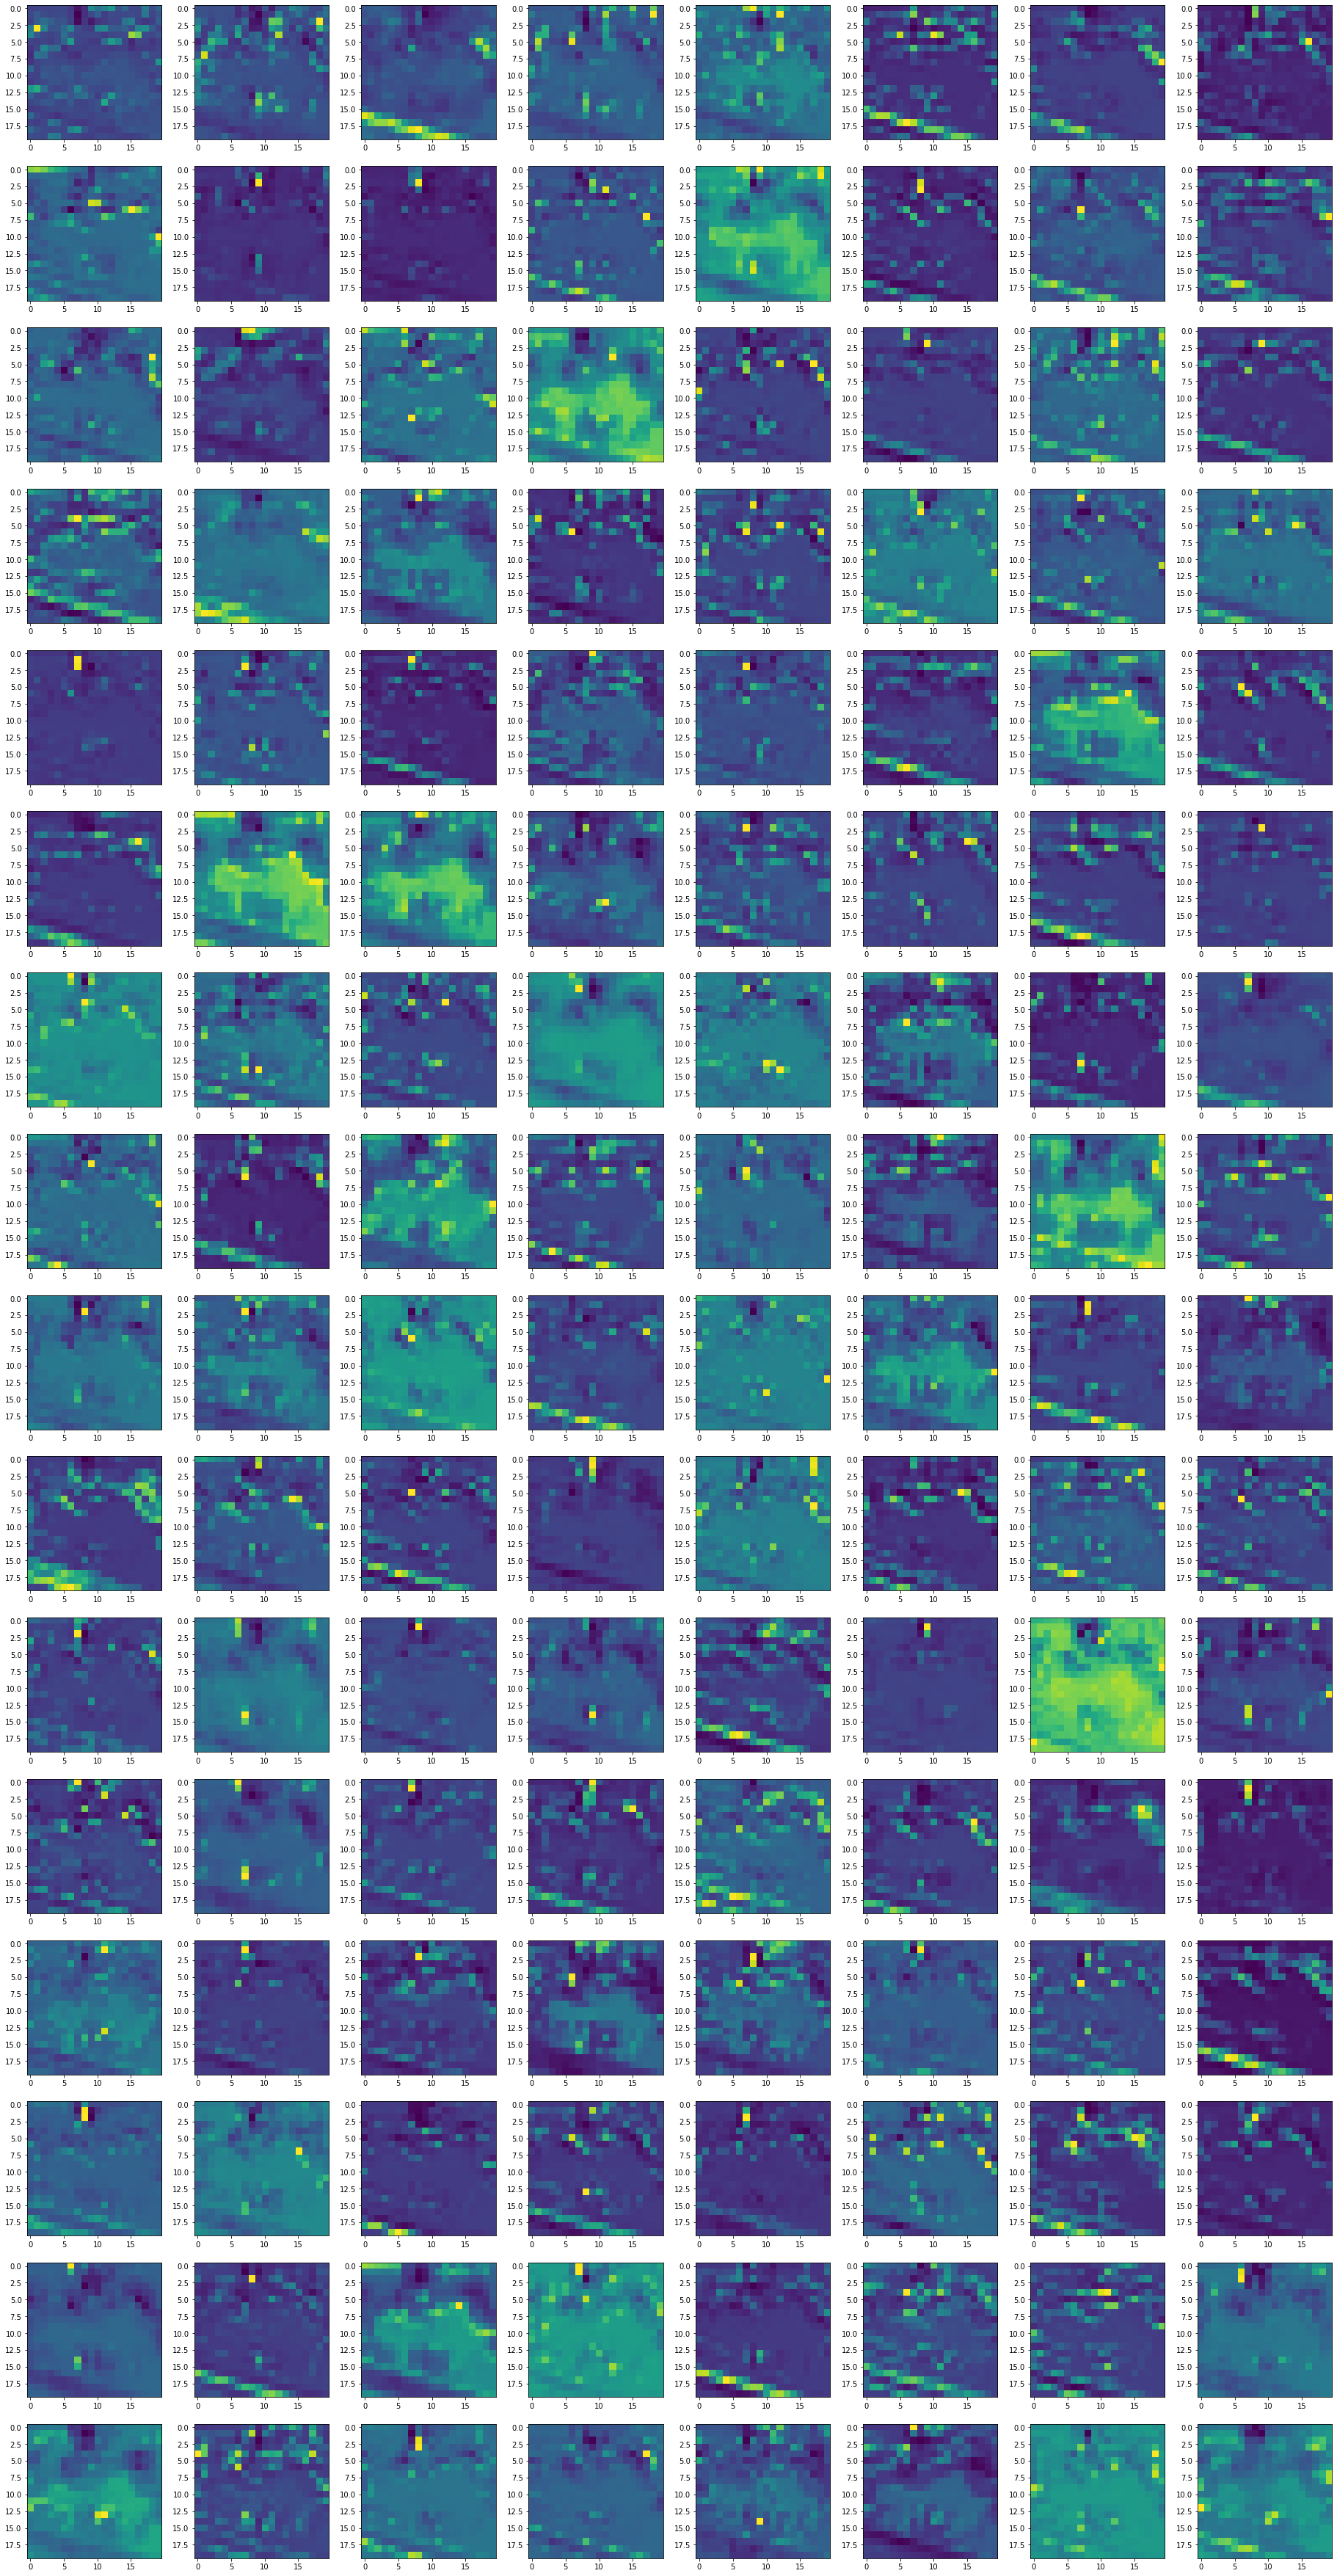

In [15]:
conv2d_3_output = model.layers[6](max_pooling2d_2_output)

fig = plt.gcf()
fig.set_size_inches(8 * 4, 16 * 4)
for i in range(128):
    plt.subplot(16,8, i+1)
    plt.imshow(conv2d_3_output[0, :, :, i])